# Logistic Regression

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)

In [3]:
clf.predict(X[:2, :])

array([0, 0])

In [4]:
clf.predict_proba(X[:2, :])

array([[9.81815095e-01, 1.81848911e-02, 1.44119160e-08],
       [9.71757624e-01, 2.82423461e-02, 3.01375022e-08]])

In [5]:
clf.score(X, y)

0.9733333333333334

# Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
confusion_matrix(y, clf.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [8]:
confusion_matrix(y, clf.predict(X), normalize='true')

array([[1.  , 0.  , 0.  ],
       [0.  , 0.94, 0.06],
       [0.  , 0.02, 0.98]])

# 1. Solve classification problem using 'classification.csv' dataset

##### target variable is 'default'. Apply feature selection, feature scaling, cross validation etc. (anything you think is needed)

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('classification.csv')
df.head()


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,1
1,27,no high school,10,6,31,17.3,1.362202,4.000798,0
2,40,no high school,15,14,55,5.5,0.856075,2.168925,0
3,41,no high school,15,14,120,2.9,2.658720,0.821280,0
4,24,high school,2,0,28,17.3,1.787436,3.056564,1


In [11]:
for col in df.columns: 
    print(col) 

age
ed
employ
address
income
debtinc
creddebt
othdebt
default


In [12]:
ed = ["ed"]
df_processed = pd.get_dummies(df, prefix_sep="__",
                              columns=ed)
df_processed.head()

,age,employ,address,income,debtinc,creddebt,othdebt,default,ed__college degree,ed__high school,ed__no high school,ed__postgraduate,ed__undergraduate
0,41,17,12,176,9.3,11.359392,5.008608,1,1,0,0,0,0
1,27,10,6,31,17.3,1.362202,4.000798,0,0,0,1,0,0
2,40,15,14,55,5.5,0.856075,2.168925,0,0,0,1,0,0
3,41,15,14,120,2.9,2.658720,0.821280,0,0,0,1,0,0
4,24,2,0,28,17.3,1.787436,3.056564,1,0,1,0,0,0


In [13]:
wrong_age = df_processed[df_processed.age == 0].index
df_processed.drop(wrong_age, axis=0, inplace=True)

In [14]:
from sklearn.preprocessing import PolynomialFeatures

df_wo_target = df_processed.drop(['default'], axis=1)

colss = df_wo_target.columns
poly = PolynomialFeatures(4)
poly_features = poly.fit_transform(df_wo_target)
poly_features = pd.DataFrame(poly_features, columns = poly.get_feature_names(colss))

print(df_processed.shape)
df_processed = pd.concat([df_processed.drop(['default'], axis=1), pd.DataFrame(poly_features), df_processed.default], axis=1)
print(df_processed.shape)

(700, 13)
(700, 1833)


[0.00177456 0.00855601 0.00239799 ... 0.         0.         0.00018493]


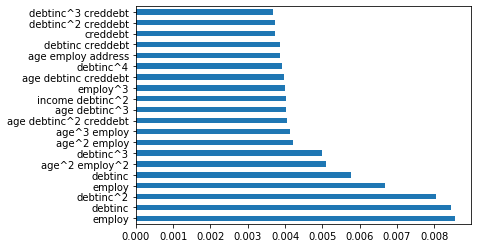

In [15]:
X = df_processed.drop(['default'], axis=1) #[['age', 'ed__college degree','ed__high school', 'ed__no high school', 'ed__postgraduate', 'ed__undergraduate' , 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']] 
y = df_processed['default'] 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()
 

In [16]:
from sklearn.preprocessing import MinMaxScaler

cols = df_processed.columns
trans = MinMaxScaler()
df_processed = trans.fit_transform(df_processed)

In [17]:
from pandas import DataFrame

df_processed = DataFrame(df_processed, columns=cols)
df_processed

,age,employ,address,income,debtinc,creddebt,othdebt,ed__college degree,ed__high school,ed__no high school,...,ed__no high school ed__postgraduate^3,ed__no high school ed__postgraduate^2 ed__undergraduate,ed__no high school ed__postgraduate ed__undergraduate^2,ed__no high school ed__undergraduate^3,ed__postgraduate^4,ed__postgraduate^3 ed__undergraduate,ed__postgraduate^2 ed__undergraduate^2,ed__postgraduate ed__undergraduate^3,ed__undergraduate^4,default
0,0.583333,0.548387,0.352941,0.375000,0.217604,0.552210,0.183897,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.194444,0.322581,0.176471,0.039352,0.413203,0.065719,0.146554,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.555556,0.483871,0.411765,0.094907,0.124694,0.041090,0.078677,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.583333,0.483871,0.411765,0.245370,0.061125,0.128811,0.028742,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.111111,0.064516,0.000000,0.032407,0.413203,0.086412,0.111567,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.444444,0.193548,0.441176,0.030093,0.102689,0.012183,0.034621,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
696,0.250000,0.193548,0.117647,0.016204,0.271394,0.017411,0.074104,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
697,0.361111,0.483871,0.088235,0.041667,0.176039,0.023337,0.070222,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698,0.694444,0.612903,0.647059,0.145833,0.195599,0.111482,0.152653,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.model_selection import KFold, train_test_split # import KFold
X = df_processed.drop(['default'], axis=1) #[['age', 'ed__college degree','ed__high school', 'ed__no high school', 'ed__postgraduate', 'ed__undergraduate' , 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']] 
y = df_processed['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [19]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [20]:
y_true = clf.score(X_train, y_train)

In [21]:
y_true

0.8123667377398721

In [22]:
y_pred = clf.score(X_test, y_test)

In [23]:
y_pred

0.8225108225108225

# 2. Print accuracy, confusion matrix, precision, recall, sensitivity and specifity on train and test (and maybe validation) datasets.

##### do not use any libraries for metrics, implement yourself

In [24]:
def accuracy(y_true, y_pred):
    return y_true[y_true == y_pred].shape[0]/y_true.shape[0]

In [25]:
# accuracy on train set
accuracy(y_train, clf.predict(X_train))

0.8123667377398721

In [26]:
# accuracy on test set 
accuracy(y_test, clf.predict(X_test))

0.8225108225108225

In [27]:
True == 1

True

In [39]:
def get_statistics(y_true, y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y_pred)):
        if y_true[i]==y_pred[i]==1:
           tp += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           fp += 1
        if y_true[i]==y_pred[i]==0:
           tn += 1
        if y_pred[i]==0 and y_true[i]!=y_pred[i]:
           fn += 1

    return(tp, fp, tn, fn)

In [40]:
y_pred.shape, y_true.shape

((175,), (175,))

In [41]:
y_true = y_test
y_pred = clf.predict(X_test)
tp, tn, fp, fn = get_statistics(y_true.values.astype(int), y_pred.astype(int))
print(tp, tn, fp, fn)

25 4 120 26


In [43]:
print(tp/(tp+fp)) #precision
print(tp/(fn+tp)) #recall #sensitivity
print((tp+tn)/(tp+tn+fn+fp)) #accuracy
print(tn/(fp+tn)) #specificity


0.1724137931034483
0.49019607843137253
0.1657142857142857
0.03225806451612903


In [44]:
y_true = y_train
y_pred = clf.predict(X_train)
tp, tn, fp, fn = get_statistics(y_true.values.astype(int), y_pred.astype(int))
print(tp, tn, fp, fn)

56 23 370 76


In [45]:
print(tp/(tp+fp)) #precision
print(tp/(fn+tp)) #recall #sensitivity
print((tp+tn)/(tp+tn+fn+fp)) #accuracy
print(tn/(fp+tn)) #specificity


0.13145539906103287
0.42424242424242425
0.15047619047619049
0.058524173027989825
